<a href="https://colab.research.google.com/github/paulocpaixao/breast_cancer/blob/main/load_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import lightgbm as lgb
import _pickle as cPickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import joblib

## Loading Dataset

In [ ]:
# Loading the dataset
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# number of rows and columns
print( 'Number of rows in the dataset : {}'.format( df.shape[0]))
print( 'Number of dataset columns: {}'.format( df.shape[1] ))

Number of rows in the dataset : 569
Number of dataset columns: 32


In [ ]:
# Checking for duplicate data
df.duplicated().sum()

0

In [ ]:
# Now, let’s have a look at whether this dataset has any null values or not
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## EDA

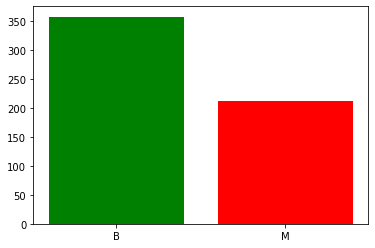

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(df['diagnosis'].value_counts().keys(),df['diagnosis'].value_counts(),color=['green','red'])
plt.show()

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.iloc[:,1]=encoder.fit_transform(df.iloc[:,1].values)

In [ ]:
df.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

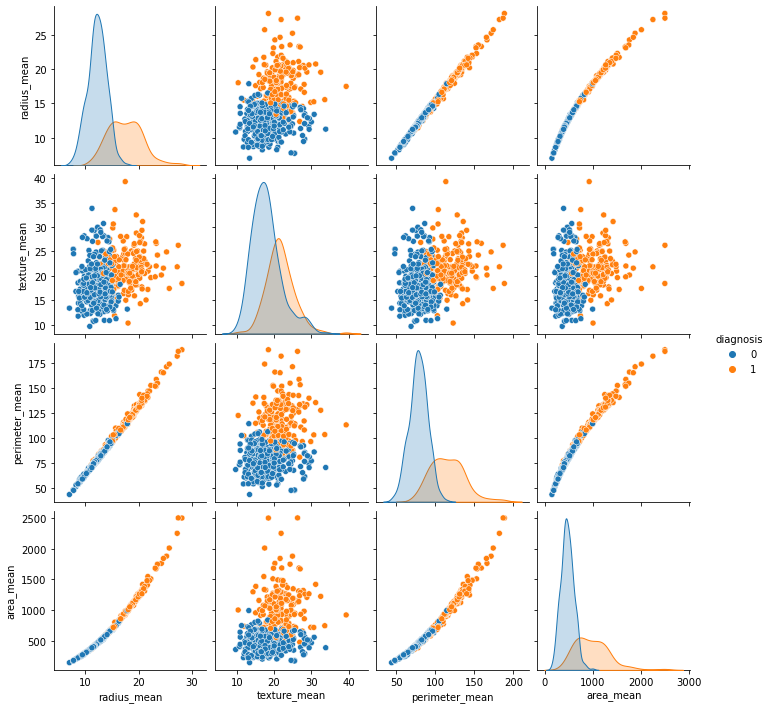

In [ ]:
sns.pairplot(df.iloc[:,1:6],hue='diagnosis')

In [ ]:
df.iloc[:,1:14].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053


<AxesSubplot:>

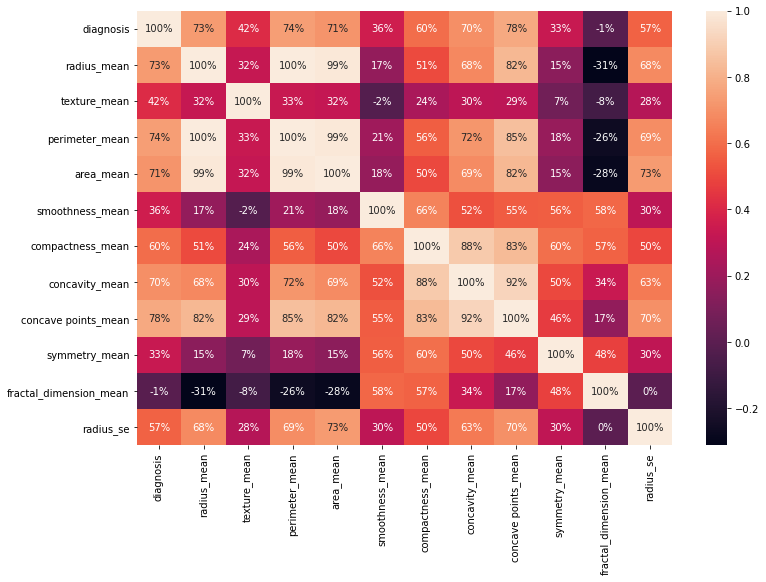

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.iloc[:,1:13].corr(),annot=True,fmt='.0%')

In [ ]:
X = df.iloc[:,2:31].values
y = df.iloc[:,1].values

In [ ]:
# Whole dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions dataset: ", len(X_train)+len(X_test))

# print proportions
print('train: {}% | Test: {}%'.format( round(len(y_train)/len(y),2), 
                                                        round(len(y_test)/len(y),2) ) )

Number transactions train dataset:  398
Number transactions test dataset:  171
Total number of transactions dataset:  569
train: 0.7% | Test: 0.3%


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print('X_train:', X_train)
print('y_train:', y_train)

print()

print('X_test:', X_test)
print('y_test:', y_test)

X_train: [[ 1.70581999  1.04974466  2.12129465 ...  2.34642696  2.04939907
   3.94428119]
 [ 0.53638811 -0.90994477  0.5690952  ...  1.05257355  1.25584994
   0.16797759]
 [-0.13145612 -0.99333581 -0.14884823 ... -0.08079455 -0.14001353
   0.74198821]
 ...
 [-0.31743806  1.31844912 -0.38065427 ... -1.08871822 -0.835536
  -0.944168  ]
 [ 0.02071092  0.25289695  0.02070601 ... -0.10785864  0.28913543
  -0.58853098]
 [ 1.59592158  1.3161327   1.57659141 ...  1.39301131  0.88090926
   0.61408367]]
y_train: [1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1

## K-FOLD

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

## Machine Learning

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
import time
start_time = time.perf_counter()

## Training Model 01: Gradient Boosting

In [ ]:
# The "fixed" hyperparameters for instantiating the model object

clf1 = GradientBoostingClassifier(random_state = 42)


# Creating a dictionary with all the values that hyperparameters will be tested

params_grid = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5],
    'n_estimators': [10, 20, 30, 40]
}


# Using gridsearch to test all grid values

clf1_gscv = GridSearchCV(clf1,params_grid,
                        cv=kfold,
                        scoring='roc_auc', 
                        verbose=10,
                        n_jobs=6)
 

# Fit the Gradient Boosting model

clf1_gscv.fit(X_train,y_train)

gc.collect()
print('Total Training Time in Minutes: ', (time.perf_counter() - start_time)/60)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 1/5; 1/256] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.973 total time=   0.0s
[CV 2/5; 2/256] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 2/5; 2/256] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.991 total time=   0.0s
[CV 4/5; 2/256] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20
[CV 4/5; 2/256] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.971 total time=   0.0s
[CV 1/5; 3/256] START max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30
[CV 1/5; 3/256] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.989 total time=   0.0s
[CV 3/5; 3/256] START max_depth=1, min_samples_leaf=2, min_samples_split=2, 

In [ ]:
# Checking clf1 performance
clf1_gscv.best_params_

{'max_depth': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 40}

In [ ]:
# Checking the mean score for performance of clf1 values
clf1_gscv.best_score_

0.987209195402299

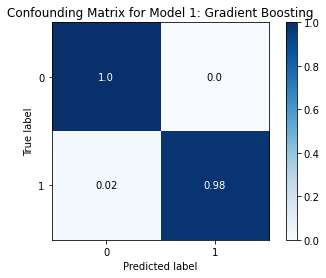

In [ ]:
#Gradient Boosting
y_pred_gbc = clf1_gscv.predict(X_train)

# Compute confusion matrix
skplt.metrics.plot_confusion_matrix(y_train,y_pred_gbc, normalize=True, title= 'Confounding Matrix for Model 1: Gradient Boosting');

In [ ]:
print(classification_report(y_train,y_pred_gbc))
print('AUC ROC: ',round(roc_auc_score(y_train,y_pred_gbc), 5))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       1.00      0.98      0.99       148

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

AUC ROC:  0.98986
[CV 3/5; 219/256] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.987 total time=   0.2s
[CV 4/5; 219/256] START max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30
[CV 4/5; 219/256] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.947 total time=   0.2s
[CV 5/5; 219/256] START max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30
[CV 5/5; 219/256] END max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=30;, score=0.973 total time=   0.2s
[CV 1/5; 220/256] START max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=4

## Training Model 02: Decision Tree

In [ ]:
# The "fixed" hyperparameters for instantiating the model object

clf2 = tree.DecisionTreeClassifier(random_state=2804)


# Creating a dictionary with all the values that hyperparameters will be tested in the decision tree

params_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9],
}

# Using gridsearch to test all grid values

clf2_gscv = GridSearchCV(
                        clf2,params_grid,
                        cv=10,
                        scoring='roc_auc', 
                        verbose=10,
                        n_jobs=1)
 
    
# Decision tree model fit

clf2_gscv.fit(X_train,y_train)

gc.collect()
print('Total Training Time in Minutes: ', (time.perf_counter() - start_time)/60)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 1/10; 1/16] END criterion=gini, max_depth=2;, score=0.967 total time=   0.0s
[CV 2/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 2/10; 1/16] END criterion=gini, max_depth=2;, score=0.933 total time=   0.0s
[CV 3/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 3/10; 1/16] END criterion=gini, max_depth=2;, score=0.967 total time=   0.0s
[CV 4/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 4/10; 1/16] END criterion=gini, max_depth=2;, score=0.980 total time=   0.0s
[CV 5/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 5/10; 1/16] END criterion=gini, max_depth=2;, score=0.885 total time=   0.0s
[CV 6/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 6/10; 1/16] END criterion=gini, max_depth=

In [ ]:
clf2_gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [ ]:
clf2_gscv.best_score_

0.9392285714285714

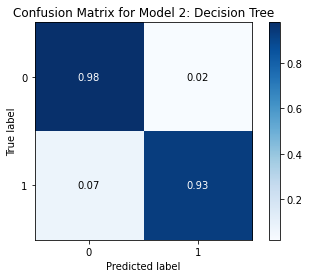

In [ ]:
#Decision Tree
y_pred_dt = clf2_gscv.predict(X_train)


# Compute confusion matrix
skplt.metrics.plot_confusion_matrix(y_train,y_pred_dt, normalize=True, title= 'Confusion Matrix for Model 2: Decision Tree');

In [ ]:
print(classification_report(y_train,y_pred_dt ))
print('AUC ROC: ',round(roc_auc_score(y_train,y_pred_dt ), 5))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       250
           1       0.97      0.93      0.95       148

    accuracy                           0.96       398
   macro avg       0.96      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398

AUC ROC:  0.95484


## Training Model 03: Logistic Regression

In [ ]:
# The "fixed" hyperparameters for instantiating the model object


clf3 = LogisticRegression(random_state = 42, solver = 'lbfgs', penalty = 'l2', class_weight='balanced')


# Creating a dictionary with all the values that hyperparameters will be tested in the decision tree

params_grid = {
    'max_iter':[1000,2000,3000],
    'C' : np.logspace(-4, 4, 50)}


# Using gridsearch to test all grid values

clf3_gscv = GridSearchCV(clf3,params_grid,
                        cv=kfold,
                        scoring='roc_auc', 
                        verbose=10,
                        n_jobs=1)
 

# Fit the logistic Regression model

clf3_gscv.fit(X_train,y_train)

gc.collect()
print('Total Training Time in Minutes: ', (time.perf_counter() - start_time)/60)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5; 1/150] START C=0.0001, max_iter=1000...................................
[CV 1/5; 1/150] END ....C=0.0001, max_iter=1000;, score=0.982 total time=   0.0s
[CV 2/5; 1/150] START C=0.0001, max_iter=1000...................................
[CV 2/5; 1/150] END ....C=0.0001, max_iter=1000;, score=0.995 total time=   0.0s
[CV 3/5; 1/150] START C=0.0001, max_iter=1000...................................
[CV 3/5; 1/150] END ....C=0.0001, max_iter=1000;, score=0.983 total time=   0.0s
[CV 4/5; 1/150] START C=0.0001, max_iter=1000...................................
[CV 4/5; 1/150] END ....C=0.0001, max_iter=1000;, score=0.980 total time=   0.0s
[CV 5/5; 1/150] START C=0.0001, max_iter=1000...................................
[CV 5/5; 1/150] END ....C=0.0001, max_iter=1000;, score=0.973 total time=   0.0s
[CV 1/5; 2/150] START C=0.0001, max_iter=2000...................................
[CV 1/5; 2/150] END ....C=0.0001, max_iter=200

In [ ]:
clf3_gscv.best_params_

{'C': 0.08685113737513521, 'max_iter': 1000}

In [ ]:
clf3_gscv.best_score_

0.9936643678160919

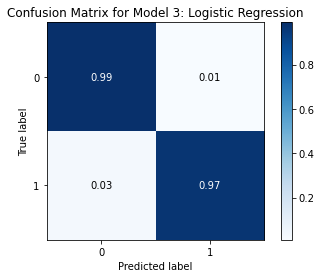

In [ ]:
#Logistic Regression
y_pred_rl= clf3_gscv.predict(X_train)

# Compute confusion matrix
skplt.metrics.plot_confusion_matrix(y_train,y_pred_rl, normalize=True, title= 'Confusion Matrix for Model 3: Logistic Regression');

In [ ]:
print(classification_report(y_train,y_pred_rl))
print('AUC ROC: ',round(roc_auc_score(y_train,y_pred_rl), 5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       250
           1       0.98      0.97      0.98       148

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398

AUC ROC:  0.98049


## Overview of Models via K-FOLD Cross-Validation 

In [ ]:
models = [GradientBoostingClassifier(max_depth= 2, min_samples_leaf= 4,min_samples_split= 2,n_estimators= 40,random_state=42),
         tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,random_state=2804),
         LogisticRegression(C= 0.08685113737513521, max_iter= 1000, random_state = 42)]
 

    
names = ['Model 01 - Gradient Boosting',
         'Model 02 - Decision Tree',
         'Model 03 - Logistic Regression']
           
      
accs = []
sens = []
auc= []
f1 = []
    
    

for model in models:
    result = cross_validate(model, X_train, y_train, cv = kfold, scoring = ['accuracy','f1', 'recall','roc_auc']) 
    accs.append(result['test_accuracy'].mean())
    sens.append(result['test_recall'].mean())
    auc.append(result['test_roc_auc'].mean())
    f1.append(result['test_f1'].mean())



aux = {'ROC_AUC':auc,'Accuracy': accs,'Sensitivity': sens,'F1-score':f1,}

result = pd.DataFrame(aux, index = names)
result.sort_values(by = 'ROC_AUC', ascending = False).round(4)

,ROC_AUC,Accuracy,Sensitivity,F1-score
Model 03 - Logistic Regression,0.9935,0.9698,0.9251,0.9573
Model 01 - Gradient Boosting,0.9872,0.9421,0.9182,0.9226
Model 02 - Decision Tree,0.9314,0.9194,0.8772,0.8888


## Saving the machine learning model

In [ ]:
with open('cancer_model.pkl', 'wb') as fid:
    cPickle.dump(clf3_gscv, fid)

## Load the model and make predictions

In [ ]:
# Loading the models for prediction into another database

cancer_model = joblib.load('cancer_model.pkl')

In [ ]:
cancer_model

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'max_iter': [1000, 2000, 3000]},
             scoring='roc_auc', verbose=10)